In [2]:
from datasets import load_dataset

import torch

/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("/home/samitha/Projects/datasets/imagenet100")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 126689
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 5000
    })
})

In [4]:
print(dataset["train"][0]['image'])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0CD74F4A90>


In [5]:
sample = dataset['train'][5000]
sample


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=240x160>,
 'label': 3}

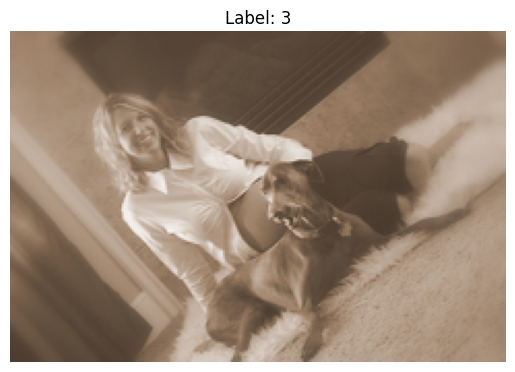

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = sample["image"]
label = sample["label"]

plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [7]:
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor()])


image_t = transform(img)
image_t.shape

torch.Size([3, 224, 224])

In [8]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandAugment(num_ops=2, magnitude=9),  # ViT style random augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


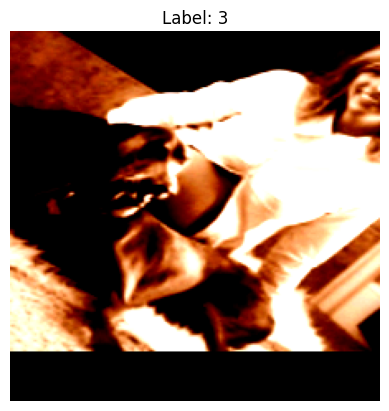

In [9]:
torch.manual_seed(50)
out = train_transform(img)

plt.imshow(out.permute(1, 2, 0))
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [29]:
xb = [transform(img) for img in dataset['train'][:100]['image']]
xb = torch.stack(xb)
xb.shape 

torch.Size([100, 3, 224, 224])

In [38]:
batch = dataset['train'][:5]

samples = list(zip(batch['image'], batch['label']))
samples


[(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>, 0),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x243>, 0),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>, 0),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>, 0),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>, 0)]

In [20]:
xb = dataset['train'][20:30]

In [21]:
xb['image']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x240>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x184>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x239>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x202>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=204x160>]

In [22]:
xb['label']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [64]:
import random 

class DataLoader():
    def __init__(self,data,transform,batch_size,Shuffle= False):
        
        self.transform = transform
        self.batch_size = batch_size
        
        self.data = list(zip(data['image'],data['label']))  # make (image,label) tuples list
        if Shuffle:
            random.shuffle(self.data)    # in place random shuffle of data 
            
        self.count = 0
        
        
    def get_batch(self):
        
        batch = self.data[self.count : self.count + self.batch_size]  # taking batch
        
        imgs,labels = zip(*batch)    # (img1,lb1),(img2,lb2) -> (im1,img2) , (lb2,lb2)
        
        xb = torch.stack([self.transform(img) for img in imgs])
        yb = torch.tensor(labels)
        
        self.count += self.batch_size   # update for next batch
        if self.count > len(self.data): # Reset for next epoch
            self.count = 0 
            random.shuffle(self.samples)
            
        
        return xb,yb 

In [66]:
loader = DataLoader(dataset['train'][:1000],train_transform,24,Shuffle=True)
xb,yb = loader.get_batch()
xb.shape

torch.Size([24, 3, 224, 224])

In [ ]:
batch = dataset['train'][:20]
batch = list(zip(batch['image'],batch['label']))
print(batch)


[(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0A6555C820>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x243 at 0x7B0BD84B6D70>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213 at 0x7B0A6555F880>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213 at 0x7B0A6555FC70>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0A6555F5E0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=161x160 at 0x7B0A6555E9B0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=241x160 at 0x7B0A6555F0D0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x178 at 0x7B0A6555C970>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x195 at 0x7B0A6555C3A0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0A6555C4F0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0A6555E3B0>, 0), (<PIL.PngImagePlugin.PngImageFile image mode=RGB size

In [58]:
imgs , labels = zip(*batch)
imgs

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x243>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=161x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=241x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x178>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x195>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x229>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=183x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>,
 <PIL.PngImagePlugin.PngImageFile image 

# Trained in Rtx 4080 16GB, max iter 400000, LR Schedule, AMP(bfloat16) + torch.compile(), Imagenet100 dataset

Min Train Loss: 1.8e-05
Min Validation Loss: 1.1369


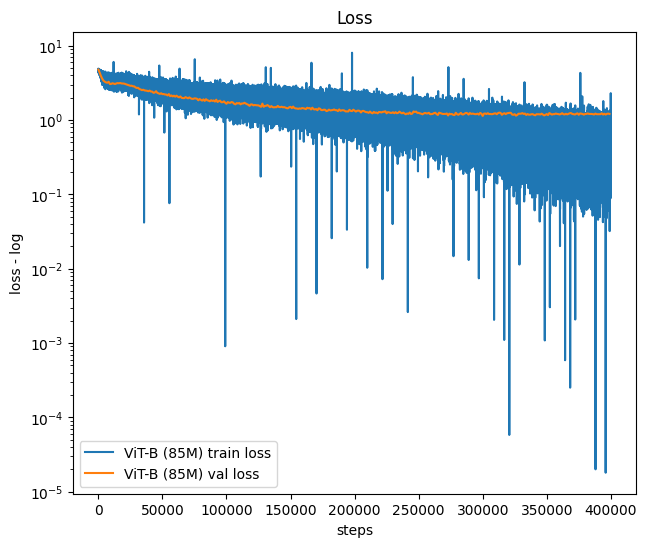

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "85M"




with open("/home/samitha/Projects/nanoViT/train_log/log.txt", "r") as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))

# losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'ViT-B ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'ViT-B ({sz}) val loss')


plt.xlabel("steps")
plt.ylabel("loss - log")
plt.yscale('log')
# plt.ylim(top=5.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

Min Train Loss: 1.8e-05
Min Validation Loss: 1.1369


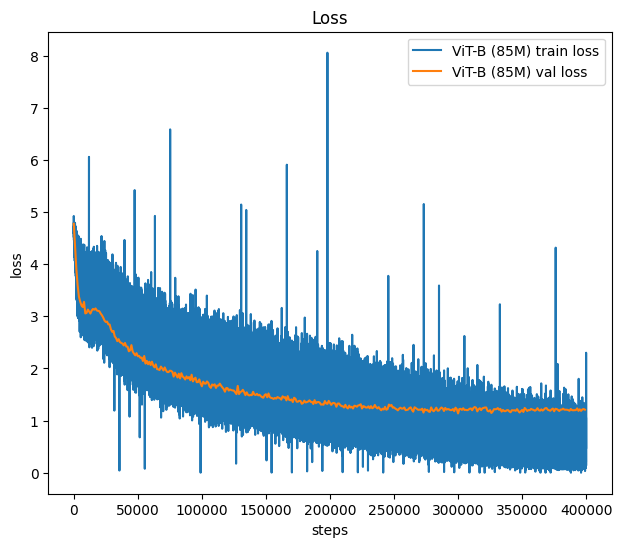

In [13]:
plt.figure(figsize=(16, 6))

# losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'ViT-B ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'ViT-B ({sz}) val loss')


plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

## Find best model

In [8]:
x,y = streams_xy["val"]
m = min(y)
y.index(m)

300

In [9]:
x[300]

300000

In [11]:
# Best model path : # /home/samitha/Projects/nanoViT/src/log/model_300000.pt